In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: title={'center': 'charges'}, ylabel='Frequency'>

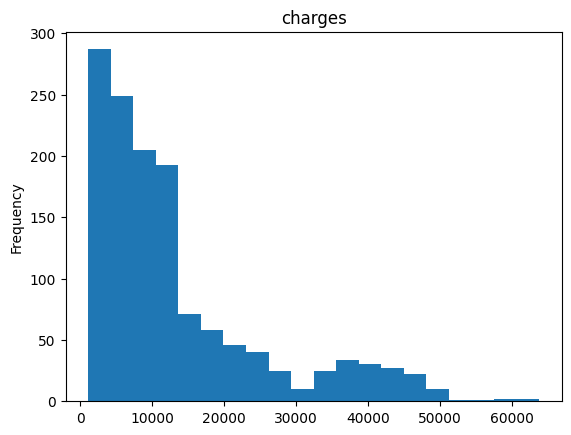

In [ ]:
# @title charges

from matplotlib import pyplot as plt
df['charges'].plot(kind='hist', bins=20, title='charges')


<ipython-input-8-922cc04eeb83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='age',y='charges',palette='husl')


<Axes: xlabel='age', ylabel='charges'>

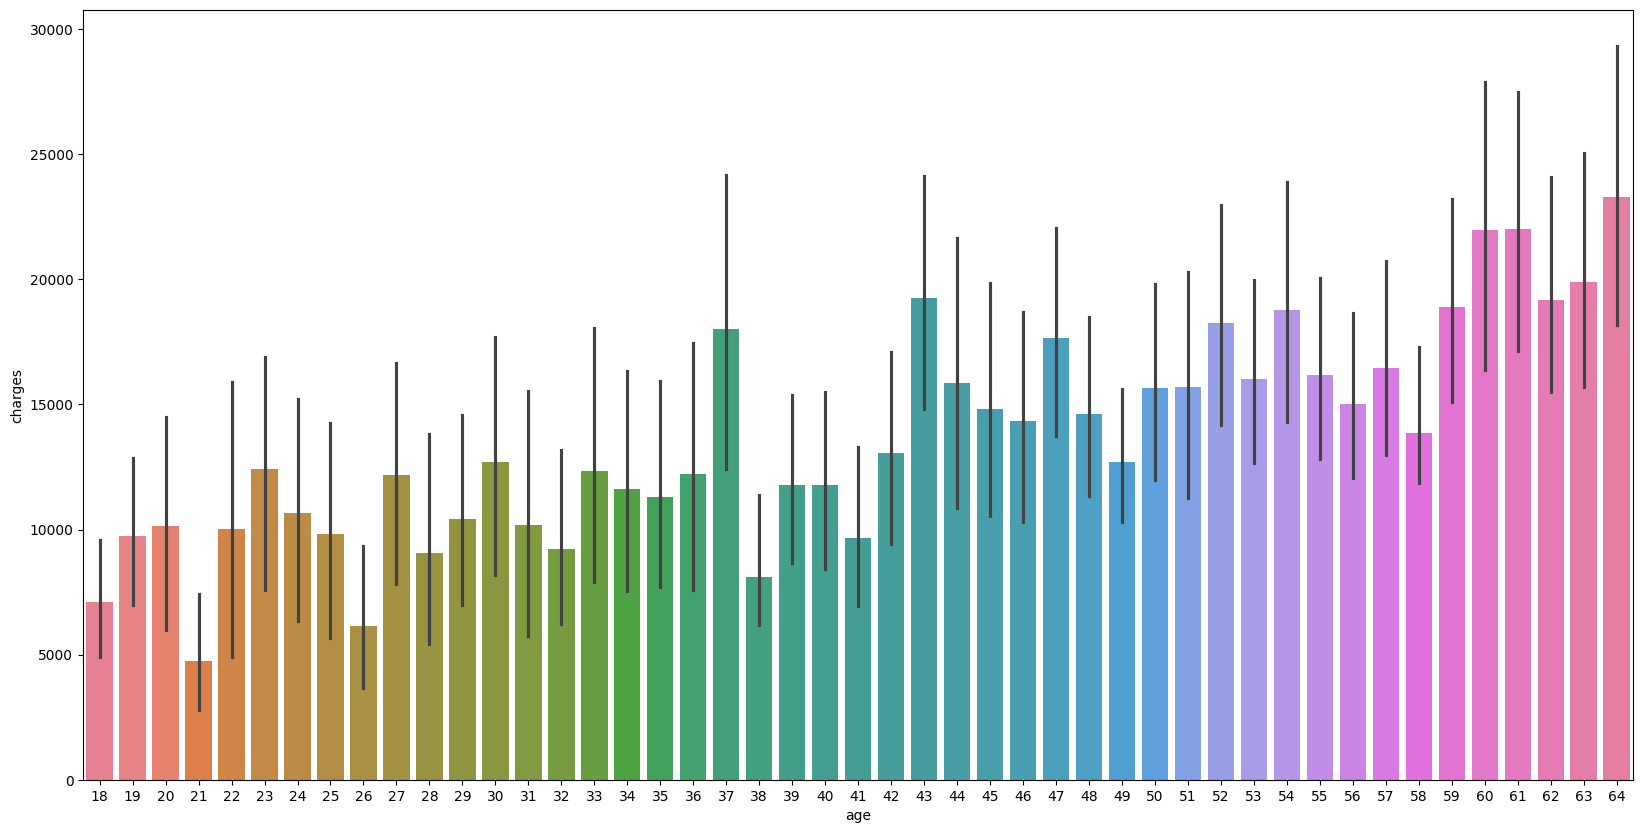

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='age',y='charges',palette='husl')

<Axes: xlabel='bmi', ylabel='charges'>

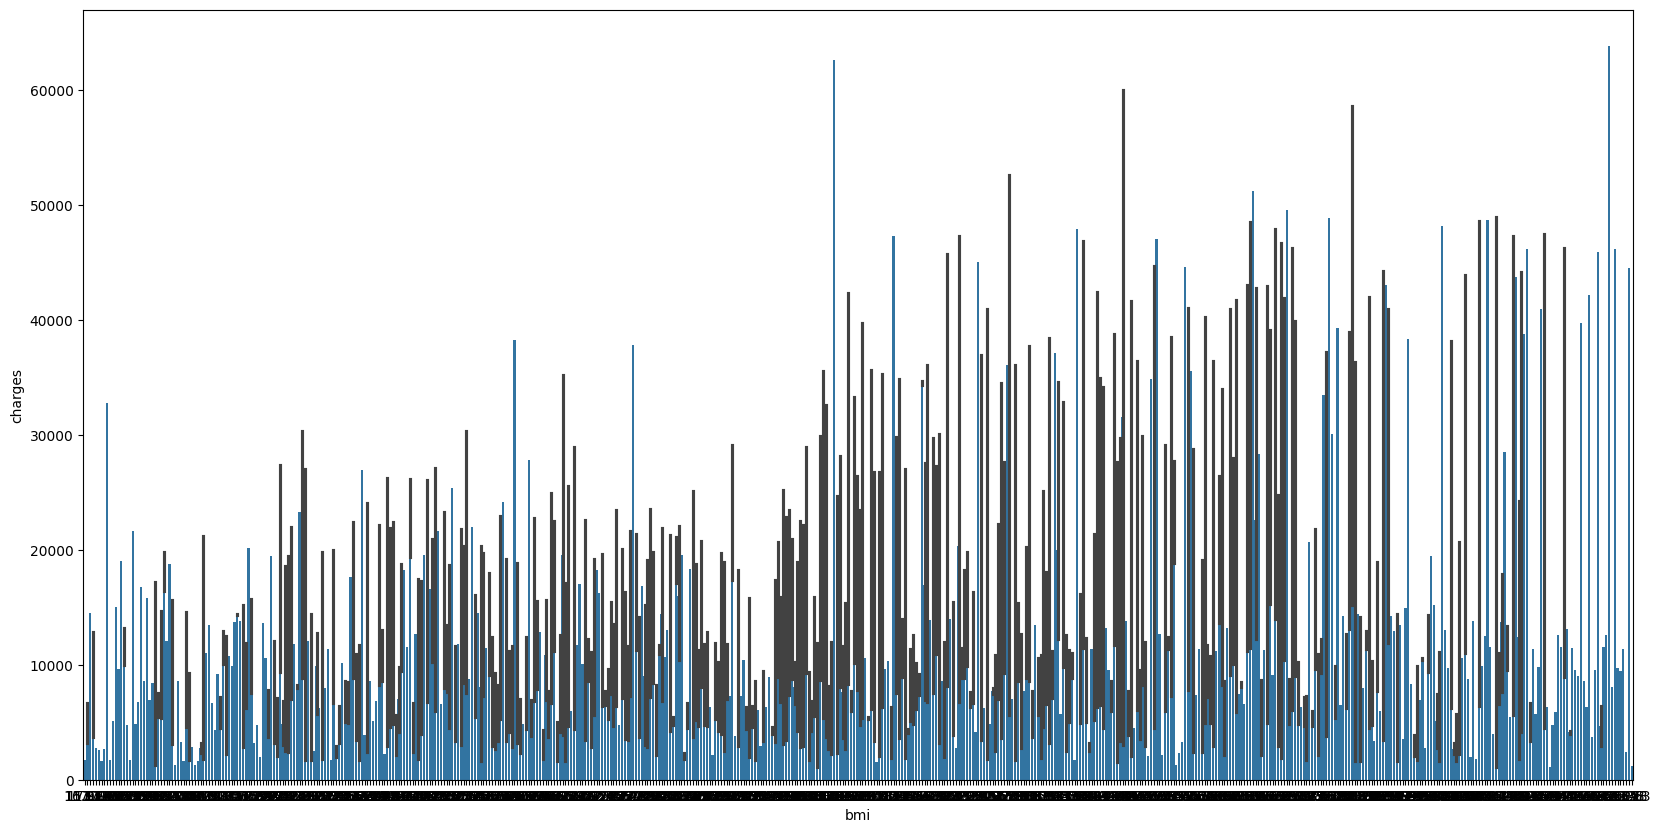

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='bmi',y='charges')

In [ ]:
lecol = []
for col in df.columns:
    if df[col].dtype == 'O':
        lecol.append(col)

In [ ]:
df_copy=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in lecol:
  df[i]=le.fit_transform(df[i])

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
from sklearn.preprocessing import StandardScaler
df_copy=df.copy()
ss=StandardScaler()
ssage=df_copy.age
ssage=ssage.values.reshape(-1,1)
df_copy['age']=ss.fit_transform(ssage)
ssbmi=df_copy.bmi
ssbmi=ssbmi.values.reshape(-1,1)
df_copy['bmi']=ss.fit_transform(ssbmi)
sscharg=df_copy.charges
sscharg=sscharg.values.reshape(-1,1)
df_copy['charges']=ss.fit_transform(sscharg)


In [ ]:
df_copy

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1,-0.220551
1334,-1.509965,0,0.206139,0,0,0,-0.914002
1335,-1.509965,0,1.014878,0,0,2,-0.961596
1336,-1.296362,0,-0.797813,0,0,3,-0.930362


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lesex=df_copy.sex
lesex=lesex.values.reshape(-1,1)
df_copy['sex']=le.fit_transform(lesex)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lesmok=df_copy.smoker
lesmok=lesmok.values.reshape(-1,1)
df_copy['smoker']=le.fit_transform(lesmok)
lereg=df_copy.region
lereg=lereg.values.reshape(-1,1)
df_copy['region']=le.fit_transform(lereg)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_copy.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [ ]:
skewed=[]
for i in df_copy.columns[0:6]:
  skew=df_copy[i].skew()
  if skew>=0.5:
    skewed.append(i)


In [ ]:
skewed

['children', 'smoker']

<Axes: xlabel='charges', ylabel='Density'>

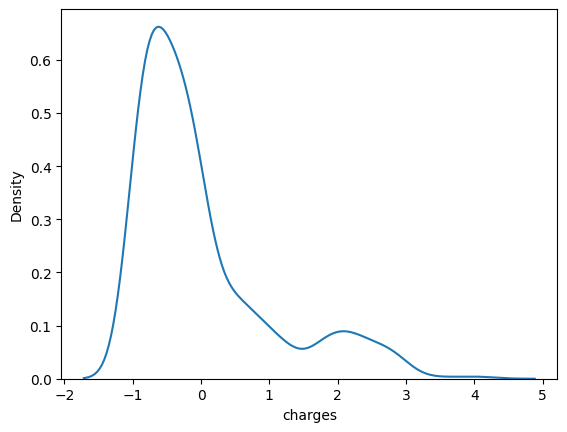

In [ ]:

sns.kdeplot(df_copy['charges'])

In [ ]:
for i in skewed:
  df_copy[i]=np.log1p(df_copy[i])


In [ ]:
df_copy.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.264083
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [ ]:
x=df_copy.drop('charges',axis=1)
y=df_copy['charges']

In [ ]:
x1=df.drop('charges',axis=1)
y1=df['charges'].to_numpy().reshape(-1,1)

In [ ]:
x_train.shape,x_test.shape

((1070, 6), (268, 6))

In [ ]:
from functools import lru_cache
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ridge_regression,Ridge
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,confusion_matrix,mean_squared_error,accuracy_score


lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
lemse=mean_squared_error(y_test,pred)
lermse=np.sqrt(lemse)
r2le=r2_score(y_test,pred)
scorele=lr.score(x_train,y_train)
bstle=cross_val_score(estimator=lr,X=x,y=y,cv=10).mean()
print(bstle.mean())
print(r2le)
print(lermse)
bstle

0.7448047213193172
0.7942462599118463
0.4692193307823245


0.7448047213193172

In [ ]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [ ]:
maxAcc=0
rs=0
def clssify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    r2score = r2_score(y_train, clf.predict(x_train))
    print("r2_score :",r2score)
    cv = cross_val_score(estimator=clf, X=x, y=y, cv=10)
    print("Cross_val_score :",cv.mean())
    #acc = accuracy_score(y_test, pred)


In [ ]:

clf=SVR()
clssify(clf,x,y)


r2_score : 0.8251373120495527
Cross_val_score : 0.8288611414004299


In [ ]:
clf=XGBRegressor()
clssify(clf,x,y)

r2_score : 0.9957364697450881
Cross_val_score : 0.8073609049540881


In [ ]:
rd=Ridge()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
param_grid={'alpha':[0.001,0.1,1,10]}
gridrd=GridSearchCV(rd,param_grid,cv=5)
gridrd.fit(x_train,y_train)
print("Best Score :",gridrd.best_score_)
bstrd=gridrd.best_score_


print("Best alpha :",gridrd.best_params_['alpha'])

Best Score : 0.7524687595044487
Best alpha : 0.1


In [ ]:
rd=Ridge(0.1)
rd.fit(x_train,y_train)
print(rd.coef_)
print("Score :",rd.score(x_train,y_train))

[ 0.30183365  0.00723413  0.17665477  0.03688254  2.00003709 -0.03894676]
Score : 0.7575595875684119


In [ ]:
predrd=rd.predict(x_test)
rdmse=mean_squared_error(y_test,predrd)
rdrmse=np.sqrt(mean_squared_error(y_test,predrd))
r2rd=r2_score(y_test,predrd)
bstrd=gridrd.best_score_
print(mean_squared_error(y_test,predrd))
print('Best Score :',gridrd.best_score_)
print('mean_squared_error :',np.sqrt(mean_squared_error(y_test,predrd)))

0.21978588888326958
Best Score : 0.7524687595044487
mean_squared_error : 0.4688132772045493


In [ ]:
sv=SVR()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
param_grid={'kernel':['linear','poly','rbf']}
gridsv=GridSearchCV(sv,param_grid,cv=5)
gridsv.fit(x_train,y_train)
print("Best Score :",gridsv.best_score_)

print("Best kernel :",gridsv.best_params_['kernel'])


Best Score : 0.8296758593485549
Best kernel : rbf


In [ ]:
best_model=SVR(kernel='rbf')
best_model.fit(x_train,y_train)
print(best_model.score(x_train,y_train))
pred_y=best_model.predict(x_test)
r2sv=r2_score(y_test,pred_y)
bstsv=gridsv.best_score_
svmse=mean_squared_error(y_test,pred_y)
svrmse=np.sqrt(mean_squared_error(y_test,pred_y))
print('MSE :',mean_squared_error(y_test,pred_y))
print("RMSE :",np.sqrt(mean_squared_error(y_test,pred_y)))
bstsv

0.852060573097339
MSE : 0.1471702321400901
RMSE : 0.3836277259793537


0.8296758593485549

In [ ]:
kernel_list=['linear','rbf','poly']
for i in kernel_list:
  svr=SVR(kernel=i)
  svr.fit(x_train,y_train)
  print('Score of ',i,'=',svr.score(x_train,y_train))
  predy=svr.predict(x_test)
  print('MSE :',mean_squared_error(y_test,predy))


Score of  linear = 0.7047510994721842
MSE : 0.29068637614512866
Score of  rbf = 0.852060573097339
MSE : 0.1471702321400901
Score of  poly = 0.7319572668978342
MSE : 0.20756850953914438


In [ ]:
rndm=RandomForestRegressor()
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=1)
params_grid =  { 'n_estimators':range(100,500,100),
             'max_depth':range(1,10,5),
             'min_samples_split':range(2,5),
             'min_samples_leaf':range(1,5),
             'criterion': ['squared_error']}
x_trains=StandardScaler().fit_transform(x_train1)
x_tests=StandardScaler().fit_transform(x_test1)
y_trains=StandardScaler().fit_transform(y_train1)
y_tests=StandardScaler().fit_transform(y_test1)
gridrf=GridSearchCV(rndm,params_grid,cv=5,n_jobs=-1)
gridrf.fit(x_trains,y_trains)
print("Best Score :",gridrf.best_score_)


#print("Best kernel :",grid.best_params_['kernel'])


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score : 0.8567699303059998


In [ ]:
print('Best Max Depth :',gridrf.best_params_['max_depth'])
#print('Best Max Features :',gridrf.best_params_['max_features'])
print('Best Min Sample Leaf :',gridrf.best_params_['min_samples_leaf'])
print('Best Min Sample Split :',gridrf.best_params_['min_samples_split'])

Best Max Depth : 6
Best Min Sample Leaf : 4
Best Min Sample Split : 2


In [ ]:
rndm_model=RandomForestRegressor(max_depth=6,min_samples_leaf=4,min_samples_split=2)
rndm_model.fit(x_trains,y_trains)
print(rndm_model.score(x_trains,y_trains))
predy=rndm_model.predict(x_tests)
rfmse=mean_squared_error(y_tests,predy)
rfrmse=np.sqrt(mean_squared_error(y_tests,predy))
r2rf=r2_score(y_tests,predy)
bstrf=gridrf.best_score_
print("MSE :",mean_squared_error(y_tests,predy))
print('RMSE :',np.sqrt(mean_squared_error(y_tests,predy)))
bstrf

<ipython-input-30-9419a199e0bb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndm_model.fit(x_trains,y_trains)


0.8999428130645091
MSE : 0.14907686030283956
RMSE : 0.38610472711796673


0.8567699303059998

In [ ]:
import warnings
warnings.filterwarnings('ignore')
dtree=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
param_grids={'max_depth':[None,10,20,30],'min_samples_leaf':[2,5,10],'min_samples_split':[1,2,4]}
griddt=GridSearchCV(dtree,param_grids,cv=5)
griddt.fit(x_train,y_train)
print('Best Score :',griddt.best_score_)
print('Best Max Depth :',griddt.best_params_['max_depth'])
#print('Best Max Features :',grid.best_params_['max_features'])
print('Best Min Sample Leaf :',griddt.best_params_['min_samples_leaf'])
print('Best Min Sample Split :',griddt.best_params_['min_samples_split'])
print(dtree_model.score(x_train,y_train))

Best Score : 0.8393653405768845
Best Max Depth : None
Best Min Sample Leaf : 10
Best Min Sample Split : 2
0.8949977280839133


In [ ]:
dtree_model=DecisionTreeRegressor(max_depth=None,min_samples_leaf=10,min_samples_split=2)
dtree_model.fit(x_train,y_train)
print(dtree_model.score(x_train,y_train))
predy=dtree_model.predict(x_test)
dtmse=mean_squared_error(y_test,predy)
dtrmse=np.sqrt(mean_squared_error(y_test,predy))
r2dt=r2_score(y_test,predy)
bstdt=griddt.best_score_
print("MSE :",mean_squared_error(y_test,predy))
print('RMSE :',np.sqrt(mean_squared_error(y_test,predy)))
bstdt

0.8949977280839133
MSE : 0.13420007253279878
RMSE : 0.36633328067867216


0.8393653405768845

In [ ]:
models = [('Linear Regression', lermse, lemse, r2le, bstle),
          ('Ridge Regression', rdrmse, rdmse, r2rd, bstrd),
          ('Support Vector Regression', svrmse, rdmse, r2sv, bstsv),
          ('Random Forest Regression', rfrmse, rfmse, r2rf, bstrf),
          ('Decision Tree Regression', dtrmse, dtmse, r2dt, bstdt)
         ]

In [ ]:
result=pd.DataFrame(data=models,columns=['Model','RMSE','MSE','r2_score','Best Score'])
result

,Model,RMSE,MSE,r2_score,Best Score
0,Linear Regression,0.469219,0.220167,0.794246,0.744805
1,Ridge Regression,0.468813,0.219786,0.716762,0.752469
2,Support Vector Regression,0.383628,0.219786,0.810342,0.829676
3,Random Forest Regression,0.386105,0.149077,0.850923,0.856770
4,Decision Tree Regression,0.366333,0.134200,0.827056,0.839365
